In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic dataset with 500 rows
np.random.seed(42)  # For reproducibility

data = {
    "Study Hours": np.random.randint(1, 11, 500),  # Study hours between 1 and 10
    "Attendance": np.random.randint(50, 101, 500),  # Attendance percentage between 50 and 100
    "Assignments Completed": np.random.randint(1, 13, 500),  # Assignments completed between 1 and 12
}

# Simulate Final Exam Score based on a simple formula with some randomness
data["Final Exam Score"] = (
    0.5 * data["Study Hours"] +
    0.3 * data["Attendance"] +
    2.5 * data["Assignments Completed"] +
    np.random.normal(0, 5, 500)  # Adding some noise
).astype(int)

# Ensure scores are capped between 0 and 100
data["Final Exam Score"] = np.clip(data["Final Exam Score"], 0, 100)

# Create DataFrame
df = pd.DataFrame(data)
df.describe()  # Display the first few rows of the dataset
df


,Study Hours,Attendance,Assignments Completed,Final Exam Score
0,7,90,1,27
1,4,79,5,44
2,8,66,12,52
3,5,98,12,62
4,7,69,2,31
...,...,...,...,...
495,1,73,3,29
496,7,87,12,57
497,7,84,12,61
498,9,79,2,31


# Here we are generating the dataset randomly, each time you run this code snippet, the dataset will change.

In [59]:
# Step 2: Split Data (80%,20%)
X = df[["Study Hours", "Attendance", "Assignments Completed"]]
y = df["Final Exam Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Step 4: Predictions and Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("=== Standard Model ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


=== Standard Model ===
Mean Squared Error: 25.91
R-squared: 0.81


                       Study Hours  Attendance  Assignments Completed  \
Study Hours               1.000000   -0.005903               0.076202   
Attendance               -0.005903    1.000000              -0.017491   
Assignments Completed     0.076202   -0.017491               1.000000   
Final Exam Score          0.215459    0.407774               0.784837   

                       Final Exam Score  
Study Hours                    0.215459  
Attendance                     0.407774  
Assignments Completed          0.784837  
Final Exam Score               1.000000  


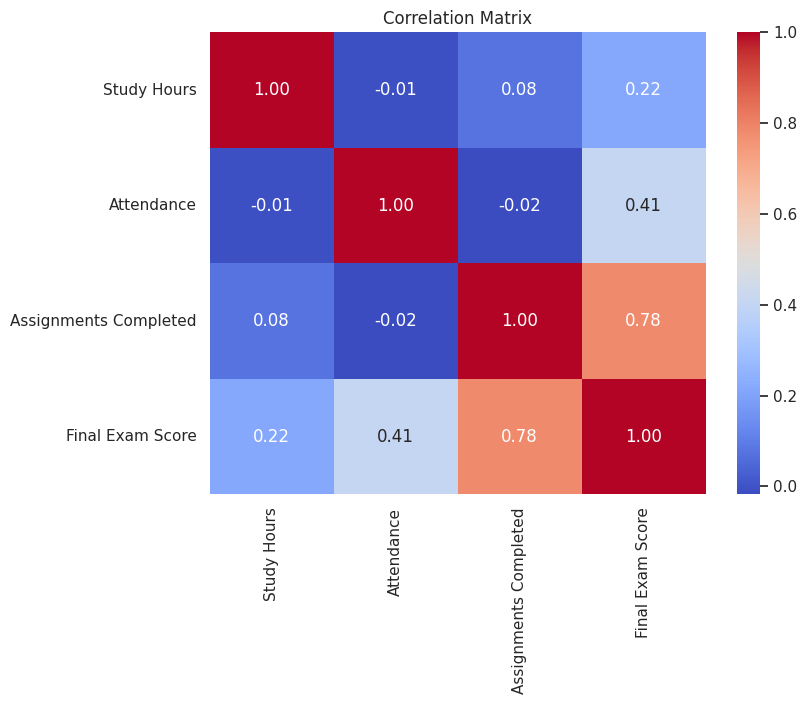

<Figure size 1000x600 with 0 Axes>

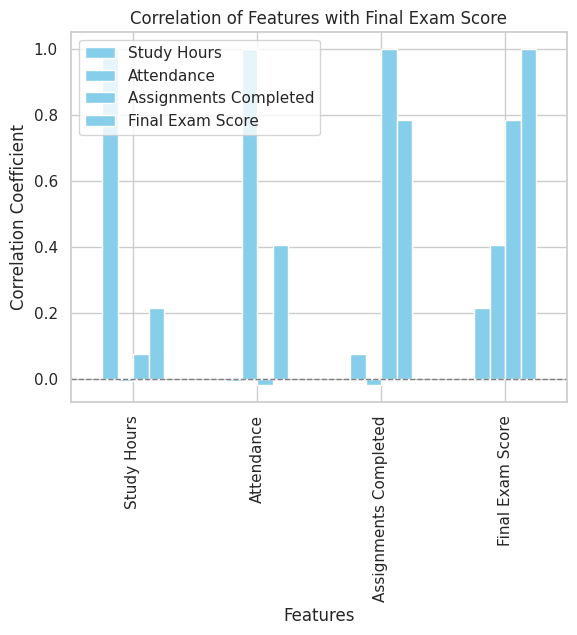

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#correlation analysis between each feature (bonus)
plt.figure(figsize=(10, 6))
correlation_matrix.plot(kind="bar", color="skyblue")
plt.title("Correlation of Features with Final Exam Score")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()



In [72]:
# Step 5: Normalize Data (Bonus)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train_norm)
y_pred_norm = model_norm.predict(X_test_norm)

mse_norm = mean_squared_error(y_test_norm, y_pred_norm)
r2_norm = r2_score(y_test_norm, y_pred_norm)


print("\n=== Normalized Model ===")
print(f"Mean Squared Error (Normalized): {mse_norm:.2f}")
print(f"R-squared (Normalized): {r2_norm:.2f}")


=== Normalized Model ===
Mean Squared Error (Normalized): 25.91
R-squared (Normalized): 0.81


Comparing the normalized and the standard model, there is slight to no difference in the results of MSE and R squred values.

In [73]:
# Input fields
print("Linear regression results")
print("Enter the details below to predict the Final Exam Score:")

# Get user input
try:
    study_hours = int(input("Study Hours (1 to 10): "))
    attendance = int(input("Attendance (%) (50 to 100): "))
    assignments_completed = int(input("Assignments Completed (1 to 12): "))

    # Validate input ranges
    if not (1 <= study_hours <= 10 and 50 <= attendance <= 100 and 1 <= assignments_completed <= 12):
        raise ValueError("Input values are out of valid range!")

    # Prepare input for prediction
    input_data = np.array([[study_hours, attendance, assignments_completed]])

    # Make prediction
    prediction = model.predict(input_data)[0]
    print(f"Predicted Final Exam Score: {prediction:.2f}")

except ValueError as e:
    print(f"Invalid input: {e}")

Linear regression results
Enter the details below to predict the Final Exam Score:
Study Hours (1 to 10): 7
Attendance (%) (50 to 100): 80
Assignments Completed (1 to 12): 6
Predicted Final Exam Score: 42.45


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
